<a href="https://colab.research.google.com/github/jcestevezc/Machine-Learning-Techniques/blob/master/Laboratorio%203/Laboratorio_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020




## Objetivos

*   Consolidar mediante la experimientación conceptos dados en clase en relación al algoritmo SVM.
*   Aplicación del algoritmo SVM para clasificación de imagenes.
*   Aplicación del proceso de aprendizaje a un caso de estudio.



# **Parte I**

Tiene la finalizar de consolidar los conceptos vistos en clase acerca del algoritmo SVM.



### 1. Importando las librerias requeridas para el desarrollo del laboratorio


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Perfilamiento y entendimiento de los datos

#### Generación de los datos

A continuación se genera un conjunto de datos linearmente separables

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


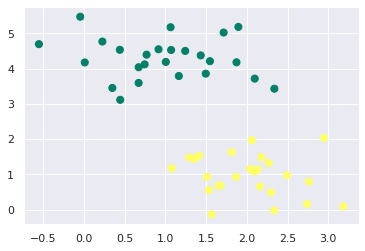

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer');

Los clasificadores lineales que conocemos normalmente dibujarán una línea recta entre las clases. 
Sin embargo con el ejemplo anterior, podríamos hacer esto inclusive a mano. 

#### Entendimiento de los Datos

Un primer elemento a considerar es que hay más de un límite de decisión (líneas, modelos o rectas) que puede lograr un error mínimo en la muestra. Vamos a trazarlos a continuación.

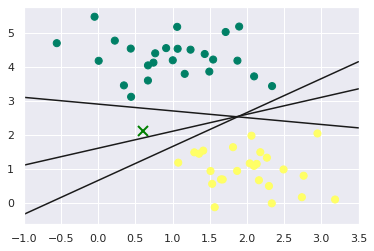

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Una restricción adicional de calidad para nuestro modelo es poder garantizar que las margenes puedan tener el mayor nivel de amplitud.Lo anterior permite garantizar la separabilidad entre las clases.

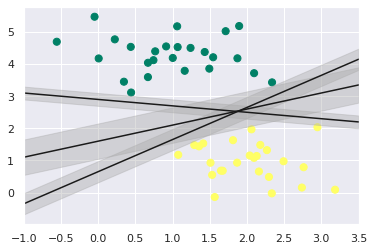

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Cuando se usa SVM, el límite de decisión que maximiza el margen se elige como el modelo óptimo.

### 4. Modelamiento

Usando los datos descritos, entrenaremos un modelo SVM con el clasificador vectorial de soporte de Scikit-Learn. 

Para esta primera parte, utilizaremos un núcleo lineal y configuraremos el parámetro C en un número arbitrariamente grande.

#### **Support Vector Machines (SVM)**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Teniendo en cuenta los resultados arrojados por el modelo procederemos a visualizar los limites de decision:

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

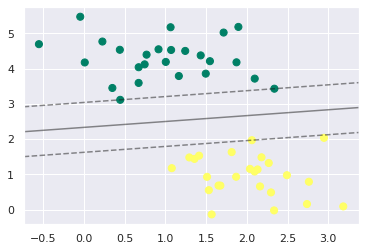

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

De acuerdo a los hiperparametros de entrenamiento configurados, la línea mas oscura que divide los datos maximiza el margen entre los dos conjuntos de puntos. 

Los puntos que tocan la margen del modelo, para este caso tres, se conocen como los vectores de soporte. 

Estos puntos que satisfacen exactamente el margen se almacenan en el atributo ***support_vectors_attribute*** del clasificador en Scikit-Learn como se muestra a continuación:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Una muestra de la capacidad de generalización del modelo ocurre al aumentar el número de elementos a clasificar. Como se observa a continuación el modelo sigue manteniendo los mismos vectores de soporte del modelo entrenado.

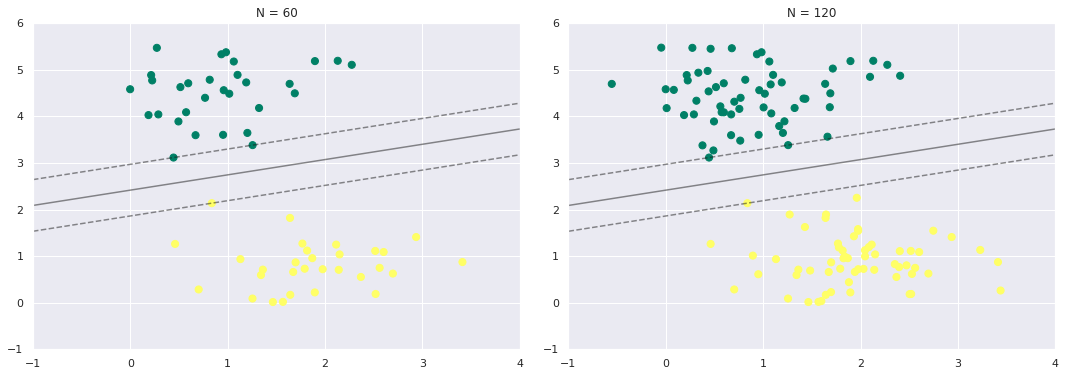

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

A continuación se muestra la adaptabilidad del modelo SVM de con un aumento del número de observaciones a clasificar.

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=(10, 200, 10), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

En caso de que no sea una función lineal, como sería el equivalente?

Para validar nuestra pregunta, realizaremos la generación de un conjunto de datos que se distribuyen cuadraticamente.

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

Ahora veremos que tipo de ajuste tiene el modelo anteriormente entrenado a nuestro nuevo dataset.

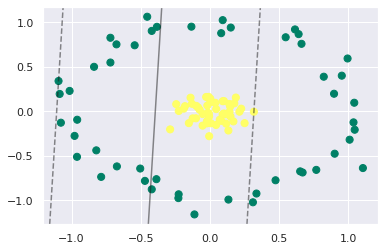

In [ ]:
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf, plot_support=False);

Como se puede apreciar el kernel lineal en este caso no es el mas adecuado para el conjunto de datos, por lo tanto se usa el kernel tipo rbf que nos genera un mejor ajuste para los datos que se distribuyen de manera cuadratica.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Al graficar nuevamente, podemos observar que el modelo entrenado con un kernel rbf se ajusta mucho mejor a nuestro conjunto de datos:

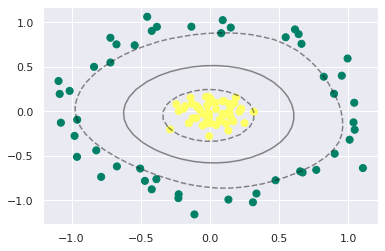

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# **Parte II**

### **1. Importando las librerias requeridas para el desarrollo del laboratorio**

In [ ]:
from sklearn.datasets import fetch_lfw_people
import warnings; warnings.simplefilter("ignore")

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### **2. Perfilamiento y entendimiento de los datos**

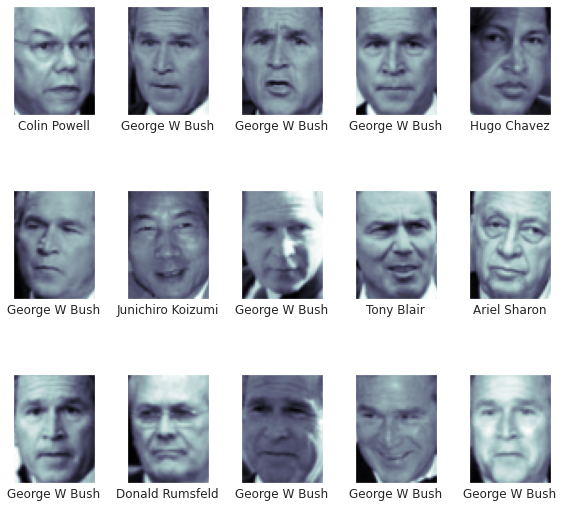

In [ ]:
fig, ax = plt.subplots(3, 5,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])
plt.tight_layout()
plt.show()

### **3. Limpieza y preparación de datos**

No aplica para este problema

### **4. Modelamiento**

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

Creando pipeline de modelamiento

In [ ]:
model = make_pipeline(pca, svc)

Particionamiento de los datos en datos de entrenamiento y pruebas

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

### Entonamiento de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
             'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 1min 9s, sys: 16.6 s, total: 1min 25s
Wall time: 52.8 s
{'svc__C': 10, 'svc__gamma': 0.001}


### **5. Predicción**

In [ ]:
model = grid.best_estimator_
yfit = model.predict(X_test)

### **6. Validación**

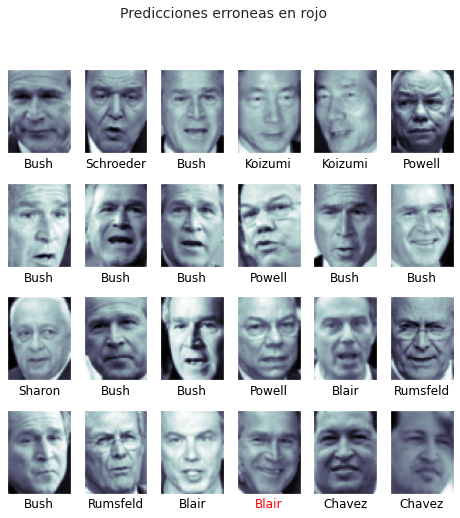

In [ ]:
fig, ax = plt.subplots(4, 6,figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicciones erroneas en rojo', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Una forma alternativa de visualizar la matrix de confusión se presenta a continuación:

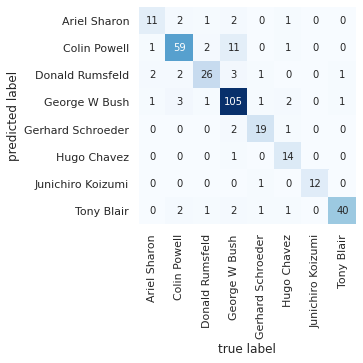

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, cmap='Blues',fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Taller

De acuerdo a los conceptos vistos en clase desarrolle el siguiente ejercicio práctico:

 1. El Internet de las Cosas (IoT) está desempeñando un papel cada vez más importante en nuestras actividades cotidianas, al habilitar la conexión de los objetos que nos rodean con servicios digitales. 
 
 Últimamente, IoT se ha visto afectado por una variedad de botnets, los cuales intentan explotar vulnerabilidades en los protocolos de aplicación que interactúan directamente con los sistemas, provocando violaciones de seguridad. 
 
 Una solución a este tipo de ataques es identificar, de manera automática, eventos maliciosos contra los protocolos de comunicación. En este sentido, ***se desea desarrollar un sistema de detección de intrusos que permita una identificación temprana de estas amenazas***. Sin embargo, el Departamento de Seguridad quiere identificar que ataque específico se está ejecutando para poder implementar los protocolos correspondientes.

Como recomendación general, se espera que para la entrega del taller se aplique la estructura establecida por la metodología CRISP- DM, según corresponda con las caracteristicas de cada conjunto de datos.